# Analysis Predictive: Prediction positive or negative diabetes

### Oleh : [Ahmad Habib Husaini](https://www.linkedin.com/in/ahmad-habib-husaini-1705711b0/)

#### Pendahuluan
`Domain project` : `Kesehatan`
#### Latar belakang

Kesehatan merupakan salah satu masalah umum yang telah ditetapkan dalam SDG(*Sustainable Development Goals)* oleh PBB. Pada tanggal 29 oktober nanti kita akan memperingati hari hari stroke sedunia. Stroke adalah salah satu penyakit mematikan, berupa gangguan pada fungsional otak akibat dari berbagai faktor salah satunya penyumbatan aliran darah ke otak.[[1]](http://download.garuda.ristekdikti.go.id/article.php?article=1111749&val=10153&title=IDENTIFIKASI%20HIPERTENSI%20DENGAN%20RESIKO%20KEJADIAN%20STROKE). Menurut WSO (*world stroke organization*) pada Global Stroke Fact Sheet 2019 menyatakan setiap tahunnya ada 13 juta kasus baru[[2]](https://www.world-stroke.org/assets/downloads/WSO_Fact-sheet_15.01.2020.pdf). Sudah seharusnya masalah ini tidak hanya berada pada kalangan medis, melainkan segenap rumpun ilmu. Oleh karenanya sebagai sangat membantu jika terdapat sebuat sistem cerdas yang dapat memprediksi seseorang menderita stroke.

# Import important package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets
import wget
import zipfile
from tqdm import tqdm
import os

# Data loading

In [2]:
if os.path.exists('stroke-prediction-dataset/healthcare-dataset-stroke-data.csv'):
    print("file sudah ada")
else:
    opendatasets.download_kaggle_dataset(dataset_url='https://www.kaggle.com/fedesoriano/stroke-prediction-dataset', data_dir='')

file sudah ada


`untuk mendapat key silahkan download API token kaggle`

In [3]:
df = pd.read_csv("stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.stroke.unique()

array([1, 0], dtype=int64)

# informasi data set : 
Attribute  | Keterangan
:------------- | :-------------
Sumber  | https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
ID | Nomor identitas pasien
Gender | Jenis kelamin (male, female, other(**dianggap invalid data**))
Hypertension | Nol jika pasien tidak menderita darah tinggi, satu sebaliknya
Heart diseease | Nol jika pasien tidak menderita penyakit jantung, satu sebaliknya
Ever married | Status pernah menikah (Yes or No)
Work type | Jenis pekerjaan terdiri dari anak-anak, Pekerjaan pemerintah, Tidak pernah bekerja, Swasta atau Wiraswasta
Residence type | Tipe tempat tinggal Rural (pedasaan) atau Urban (perkotaan)
Avg glucose type | rata-rata kadar gula dalam darah
BMI | body mass index
Smoking status | formerly smoked (Sebelumnya merokok), never smoked (tidak pernah merokok), smokes (merokok) atau "Unknown" (dianggap invalid data)
Stroke | satu jika pasien positif stroke nol sebaliknya

# Data understanding

In [5]:
print("Jumlah baris          :", df.shape[0])
print("Jumlah kolom          :", df.shape[1])
print("Jumlah missing values :", df.isnull().sum().sum())

Jumlah baris          : 5110
Jumlah kolom          : 12
Jumlah missing values : 201


`Terdapat 5110 baris, 12 kolom dan 201 missing values.` <br>
`Kolom apa saja yang terdapat missing values ?` 

In [6]:
pd.DataFrame({
    'missing value':df.isnull().sum()
})

,missing value
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


`kolom tersebut akan diisikan dengan rata-rata, namum prosesnya akan dilakukan belakangan dengan bantuan pipeline sklearn`

### cek tipe data tiap kolom

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


`Jika dilihat terdapat 7 kolom numerik dan 5 kolom categorical`,`namun jika diperhatikan kolom hypertension dan heart_disease merupakan target yang merupakan data cagetorical, oleh karenanya kita perlu mengubah tipe data dari kolom tersebut`

In [8]:
df.hypertension = df.hypertension.astype(object)
df.heart_disease = df.hypertension.astype(object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null object
heart_disease        5110 non-null object
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(2), object(7)
memory usage: 479.2+ KB


### Summary statistical descriptive

`Numerical`
1. Count  adalah jumlah sampel pada data.
2. Mean adalah nilai rata-rata.
3. Std adalah standar deviasi.
4. Min yaitu nilai minimum setiap kolom. 
5. 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
6. 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
7. 75% adalah kuartil ketiga.
8. Max adalah nilai maksimum.

`categorical:`
1. unique adalah banyaknya kategori dari setiap kolom categorical
2. top adalah kategori paling banyak dari setiap kolom
3. freq adalah banyaknya frequensi dari top

In [10]:
df.describe()

,id,age,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,106.147677,28.893237,0.048728
std,21161.721625,22.612647,45.283560,7.854067,0.215320
min,67.000000,0.080000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,271.740000,97.600000,1.000000


`pada kolom age nilai min adalah 0.08, pertanyaanya apa maksud dari 0.08 ? `, `ini menunjukan terdapat indikasi invalid data`

In [11]:
df.describe(include=object)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4
top,Female,0,0,Yes,Private,Urban,never smoked
freq,2994,4612,4612,3353,2925,2596,1892


`Pada categorical columns tidak terlihat ada yang aneh`

# Handling invalid data

`Kolom ID hanyalah nomer unik dari masing-masing pasien`,`kolo tersebut sangat kecil bahkan tidak berpengaruh sama sekali pada target`

In [12]:
target = ['stroke']
num_feature = ['age', 'avg_glucose_level','bmi']
cat_feature = [i for i in df.columns if i not in (target + num_feature + ['id'])]

In [13]:
cat_feature

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

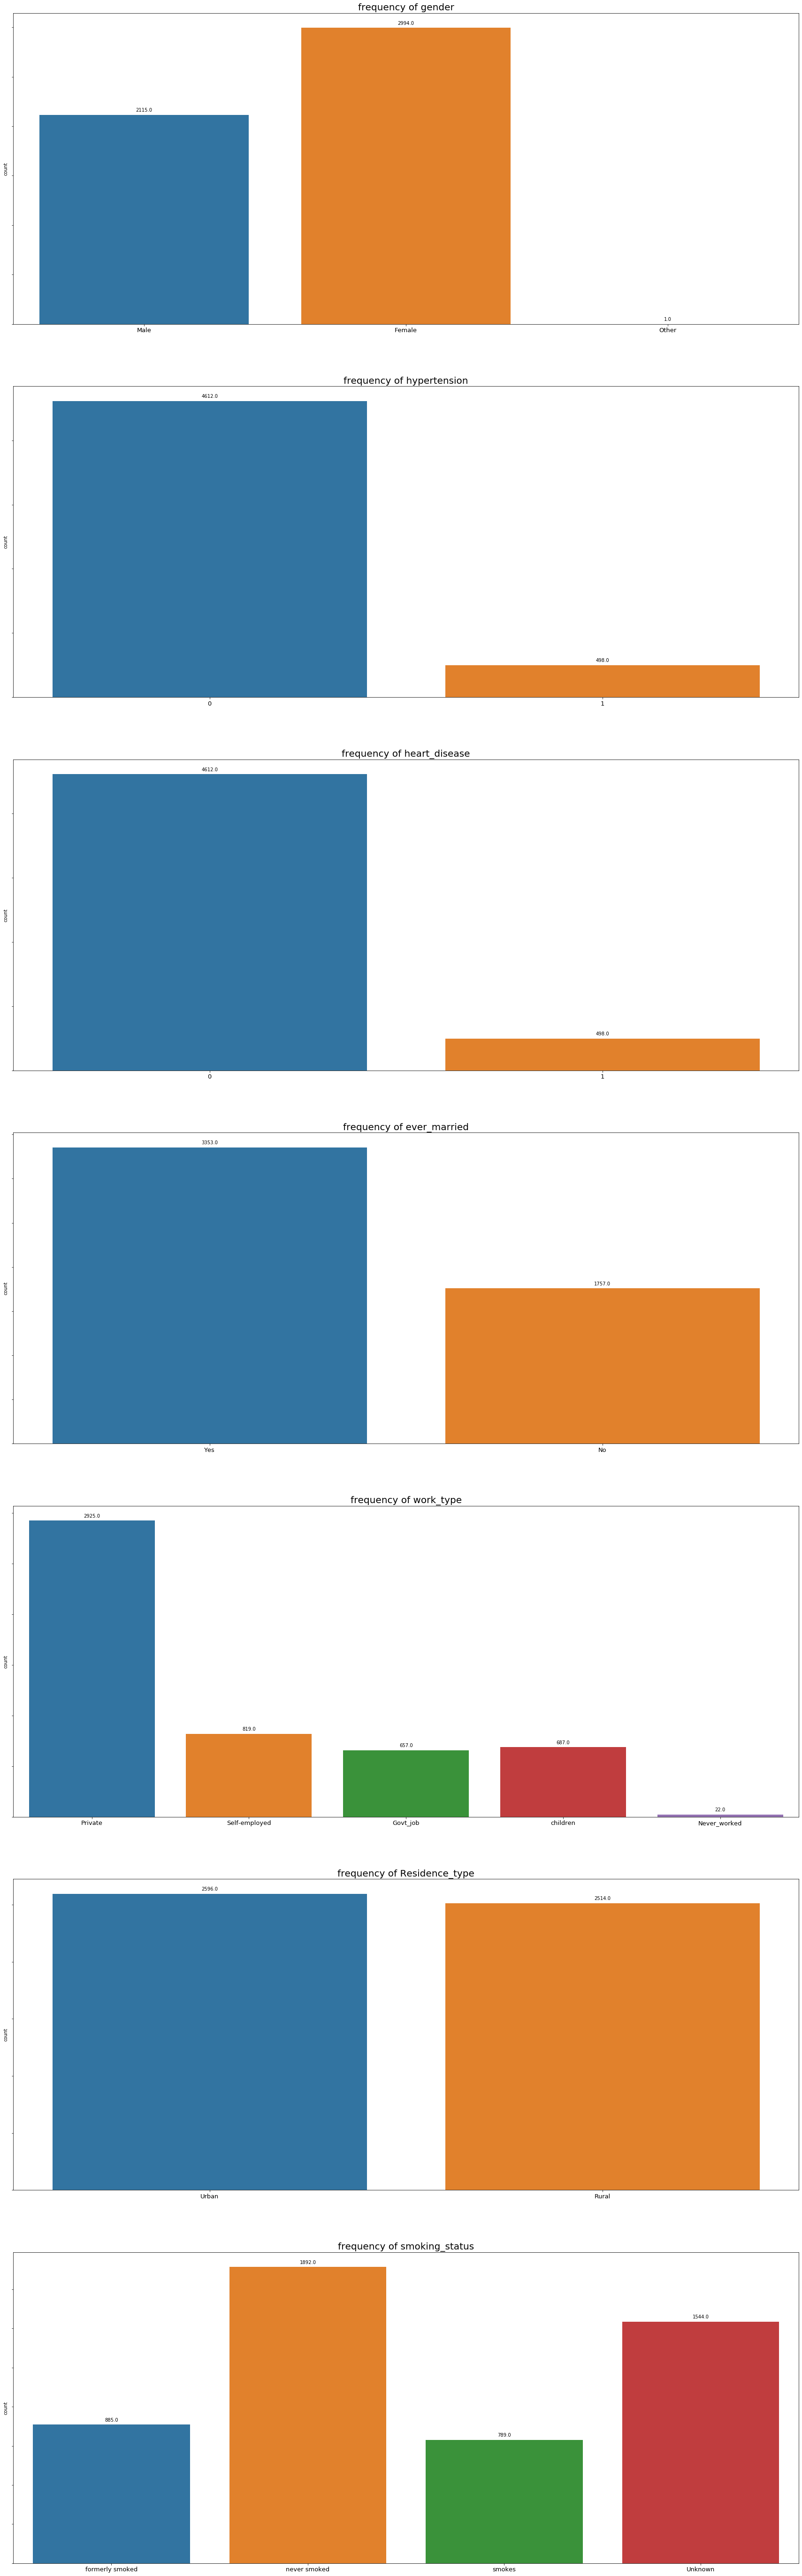

In [14]:
fig, ax = plt.subplots(len(cat_feature),1, figsize=(30,100))
idx=0
for ft in cat_feature:
    sns.countplot(data=df, x=ft, ax=ax[idx])
    for p in ax[idx].patches:
        ax[idx].annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax[idx].set_xticklabels(ax[idx].get_xticklabels(), fontsize=13)
    ax[idx].set_title("frequency of "+str(ax[idx].get_xlabel()), fontsize=20)
#     ax[idx].set_xlabel(ax[idx].get_xlabel(), fontsize=15)
    ax[idx].set_xlabel("", fontsize=15)
    ax[idx].set_yticklabels(ax[idx].get_yticklabels(), fontsize=13)
    idx+=1
plt.show()

`Pada kolom gender dan smoking status terdapat data invalid`

In [15]:
df_backup = df.copy(deep=True)

In [16]:
df[(df.gender == 'Other')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [17]:
df.groupby(by=[cat_feature[0],'stroke'])['id'].count().to_frame()

id
gender stroke      
Female 0       2853
       1        141
Male   0       2007
       1        108
Other  0          1

In [18]:
df.groupby(by=[cat_feature[1],'stroke'])['id'].count().to_frame()

id
hypertension stroke      
0            0       4429
             1        183
1            0        432
             1         66

In [19]:
df.groupby(by=[cat_feature[3],'stroke'])['id'].count().to_frame()

id
ever_married stroke      
No           0       1728
             1         29
Yes          0       3133
             1        220

In [20]:
df.groupby(by=[cat_feature[4],'stroke'])['id'].count().to_frame()

id
work_type     stroke      
Govt_job      0        624
              1         33
Never_worked  0         22
Private       0       2776
              1        149
Self-employed 0        754
              1         65
children      0        685
              1          2

In [21]:
df.groupby(by=[cat_feature[5],'stroke'])['id'].count().to_frame()

id
Residence_type stroke      
Rural          0       2400
               1        114
Urban          0       2461
               1        135

In [22]:
df.groupby(by=[cat_feature[6],'stroke'])['id'].count().to_frame()

id
smoking_status  stroke      
Unknown         0       1497
                1         47
formerly smoked 0        815
                1         70
never smoked    0       1802
                1         90
smokes          0        747
                1         42

`Jika diihat ternyata pada kolom smoking status = unknown value stroke = 1 ada 47, jika kita hapus tidak terlalu banyak sample stroke = 1 yang hilang`

In [23]:
df = df_backup.copy(deep=True)

In [24]:
df = df[(df.gender != 'Other')]
df.shape

(5109, 12)

In [25]:
df = df[(df.smoking_status !='Unknown')]
df.shape

(3565, 12)

In [26]:
df.groupby(by=[cat_feature[6],'stroke'])['id'].count().to_frame()

id
smoking_status  stroke      
formerly smoked 0        814
                1         70
never smoked    0       1802
                1         90
smokes          0        747
                1         42

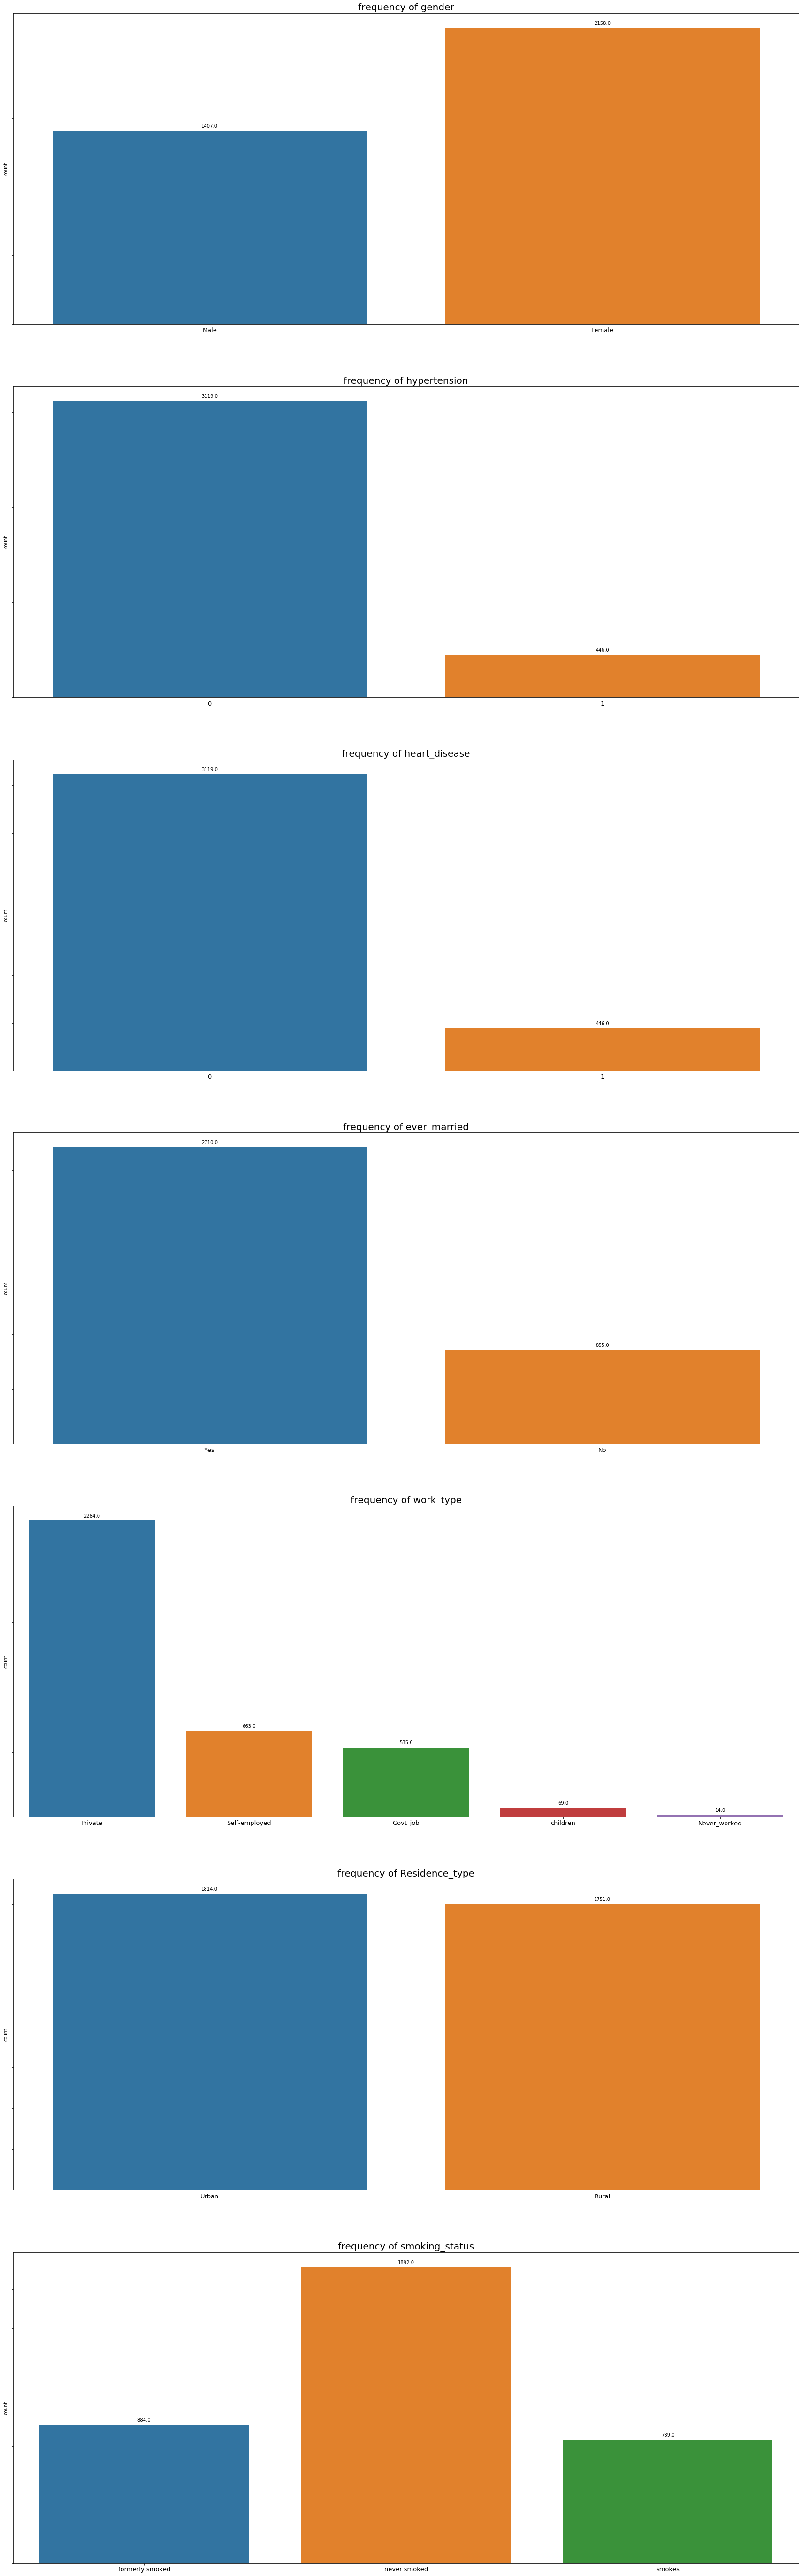

In [27]:
fig, ax = plt.subplots(len(cat_feature),1, figsize=(30,100))
idx=0
for ft in cat_feature:
    sns.countplot(data=df, x=ft, ax=ax[idx])
    for p in ax[idx].patches:
        ax[idx].annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax[idx].set_xticklabels(ax[idx].get_xticklabels(), fontsize=13)
    ax[idx].set_title("frequency of "+str(ax[idx].get_xlabel()), fontsize=20)
#     ax[idx].set_xlabel(ax[idx].get_xlabel(), fontsize=15)
    ax[idx].set_xlabel("", fontsize=15)
    ax[idx].set_yticklabels(ax[idx].get_yticklabels(), fontsize=13)
    idx+=1
plt.show()

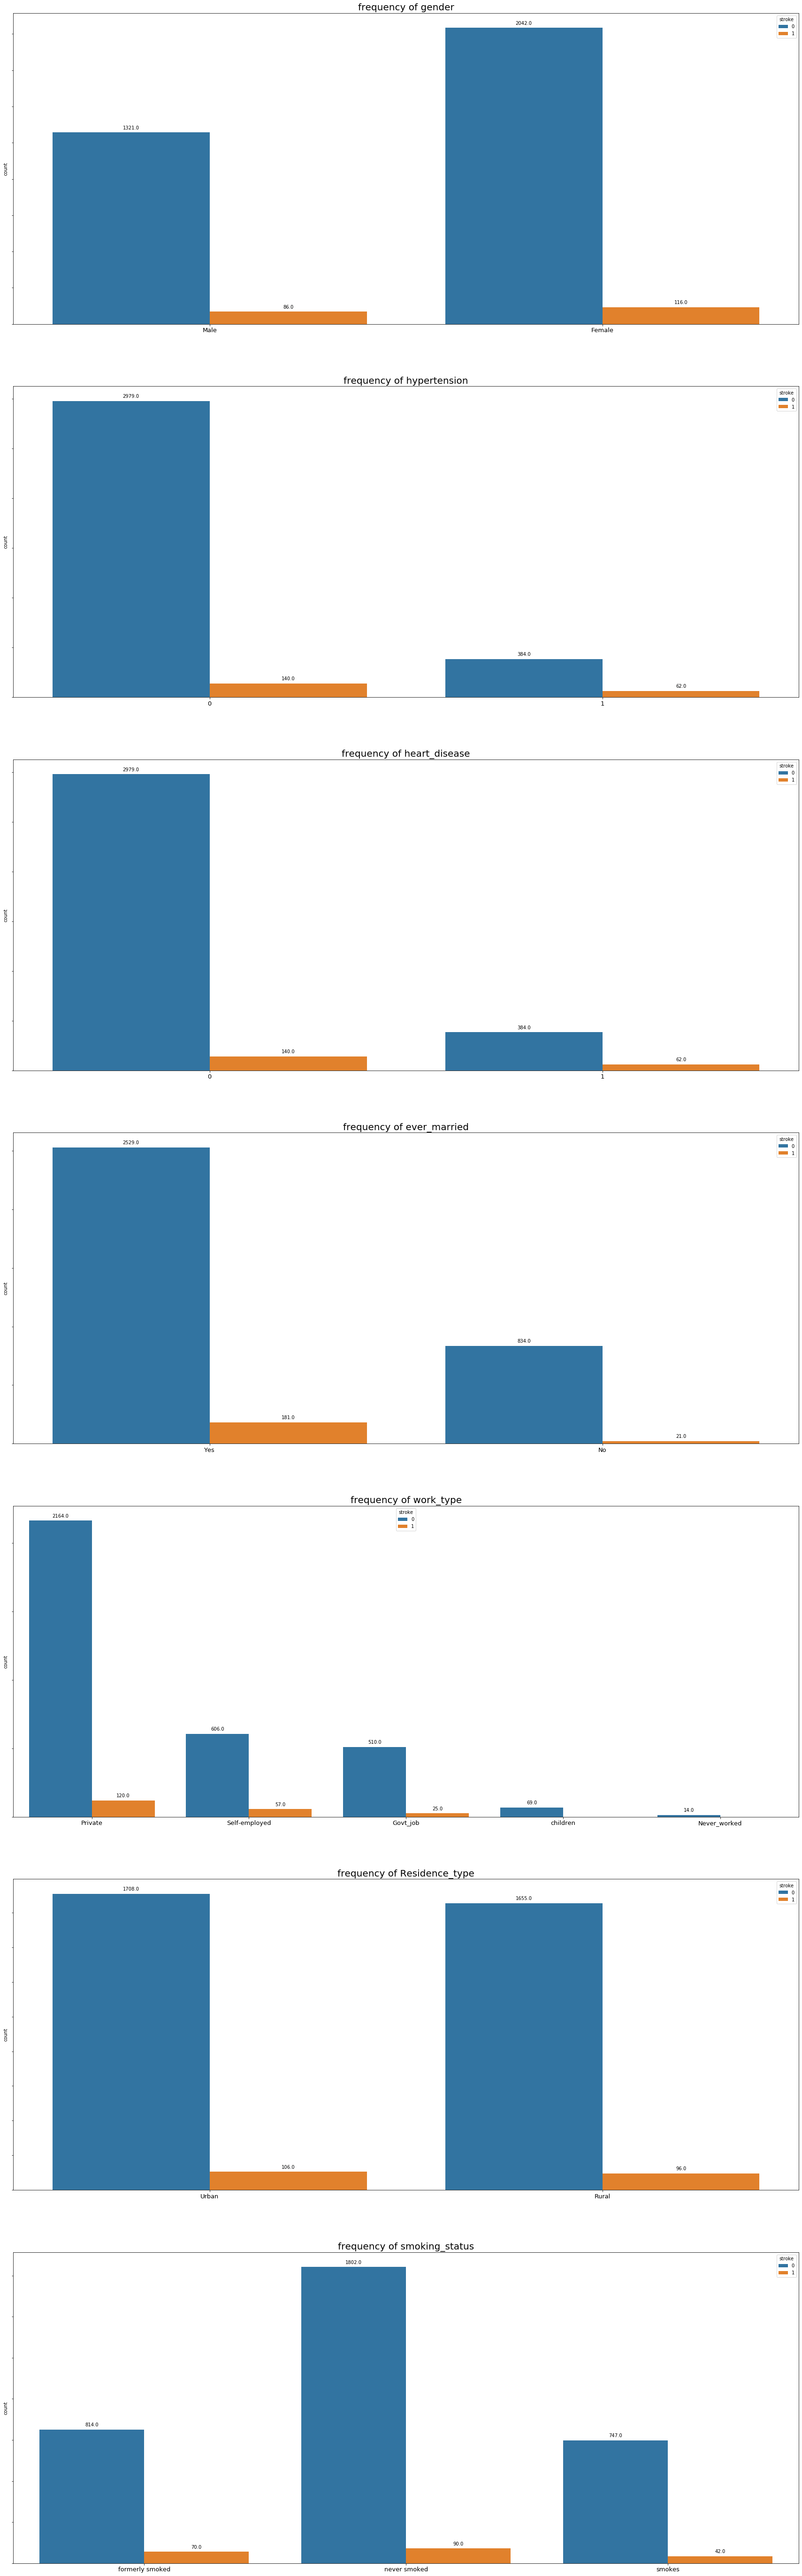

In [28]:
fig, ax = plt.subplots(len(cat_feature),1, figsize=(30,100))
idx=0
for ft in cat_feature:
    sns.countplot(data=df, x=ft, ax=ax[idx], hue='stroke')
    for p in ax[idx].patches:
        ax[idx].annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax[idx].set_xticklabels(ax[idx].get_xticklabels(), fontsize=13)
    ax[idx].set_title("frequency of "+str(ax[idx].get_xlabel()), fontsize=20)
#     ax[idx].set_xlabel(ax[idx].get_xlabel(), fontsize=15)
    ax[idx].set_xlabel("", fontsize=15)
    ax[idx].set_yticklabels(ax[idx].get_yticklabels(), fontsize=13)
    idx+=1
plt.show()

# Handling Outlier

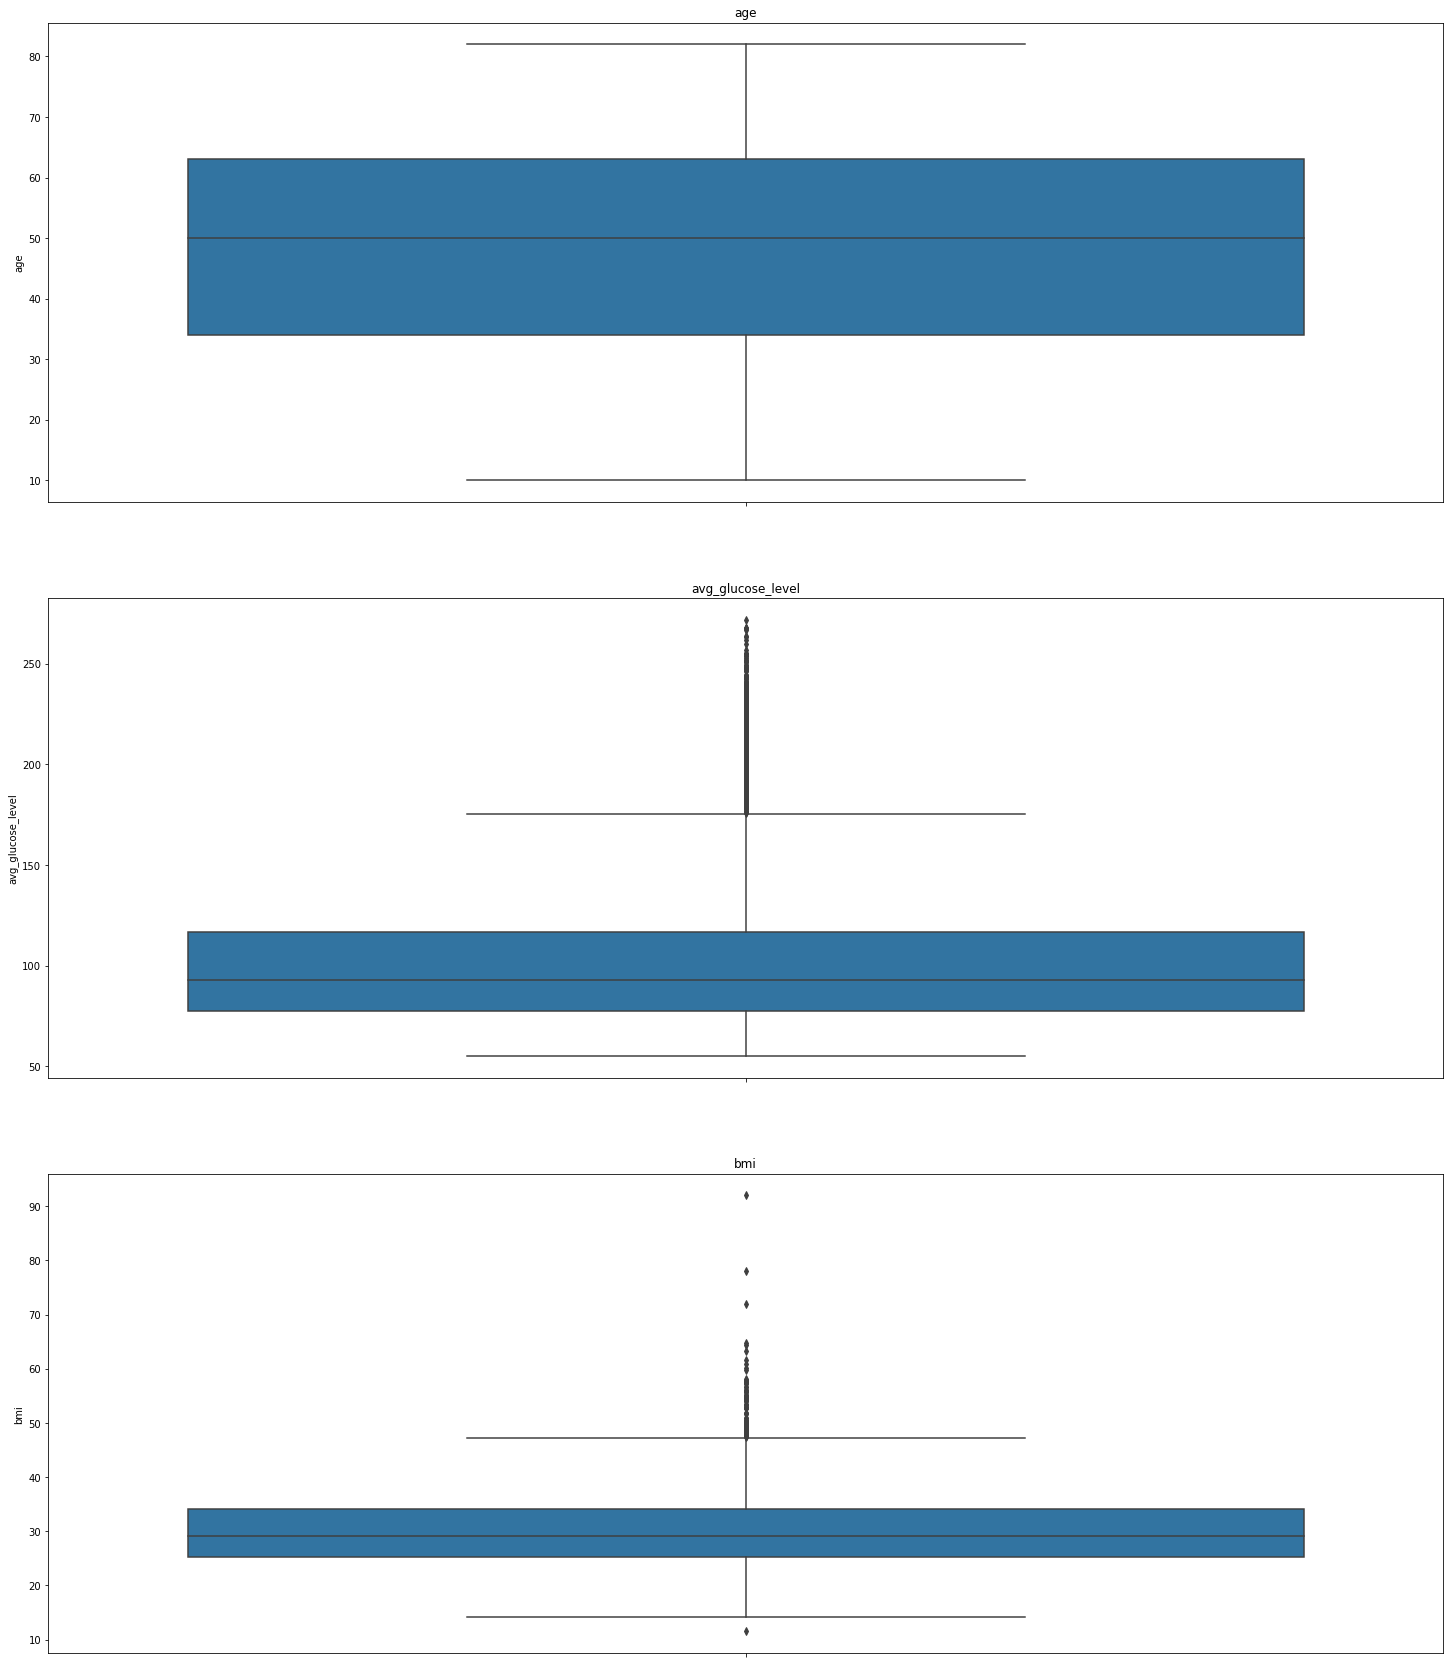

In [29]:
fig, ax = plt.subplots(len(num_feature),1, figsize=(25,30))
idx = 0
for feature in num_feature:
    sns.boxplot(data=df, y=feature, ax=ax[idx])
    ax[idx].set_title(feature)
    idx+=1

`Jika dilihat dari kolom numeric diatas terdapat cukup banyak outlier`<br>
`Hal pertama yang perlu dilakukan adalah membuat batas bawah dan batas atas.`<br>
`Untuk membuat batas bawah, kurangi Q1 dengan 1,5 * IQR.` <br>
`Kemudian, untuk membuat batas atas, tambahkan 1.5 * IQR dengan Q3.`

In [30]:
Q1 = df[num_feature].quantile(0.25)
Q3 = df[num_feature].quantile(0.75)
IQR = Q3 - Q1
IQR.to_frame()

,0
age,29.00
avg_glucose_level,39.21
bmi,8.80


`Syarat bukan outlier, (data < (Q1-1.5*IQR)) atau (data > (Q3+1.5*IQR))`

In [31]:
batas_bawah = Q1 - 1.5*IQR
batas_atas = Q3 + 1.5*IQR

In [32]:
df = df[~((df < batas_bawah) | (df > batas_atas)).any(axis=1)]
df.shape

(2994, 12)

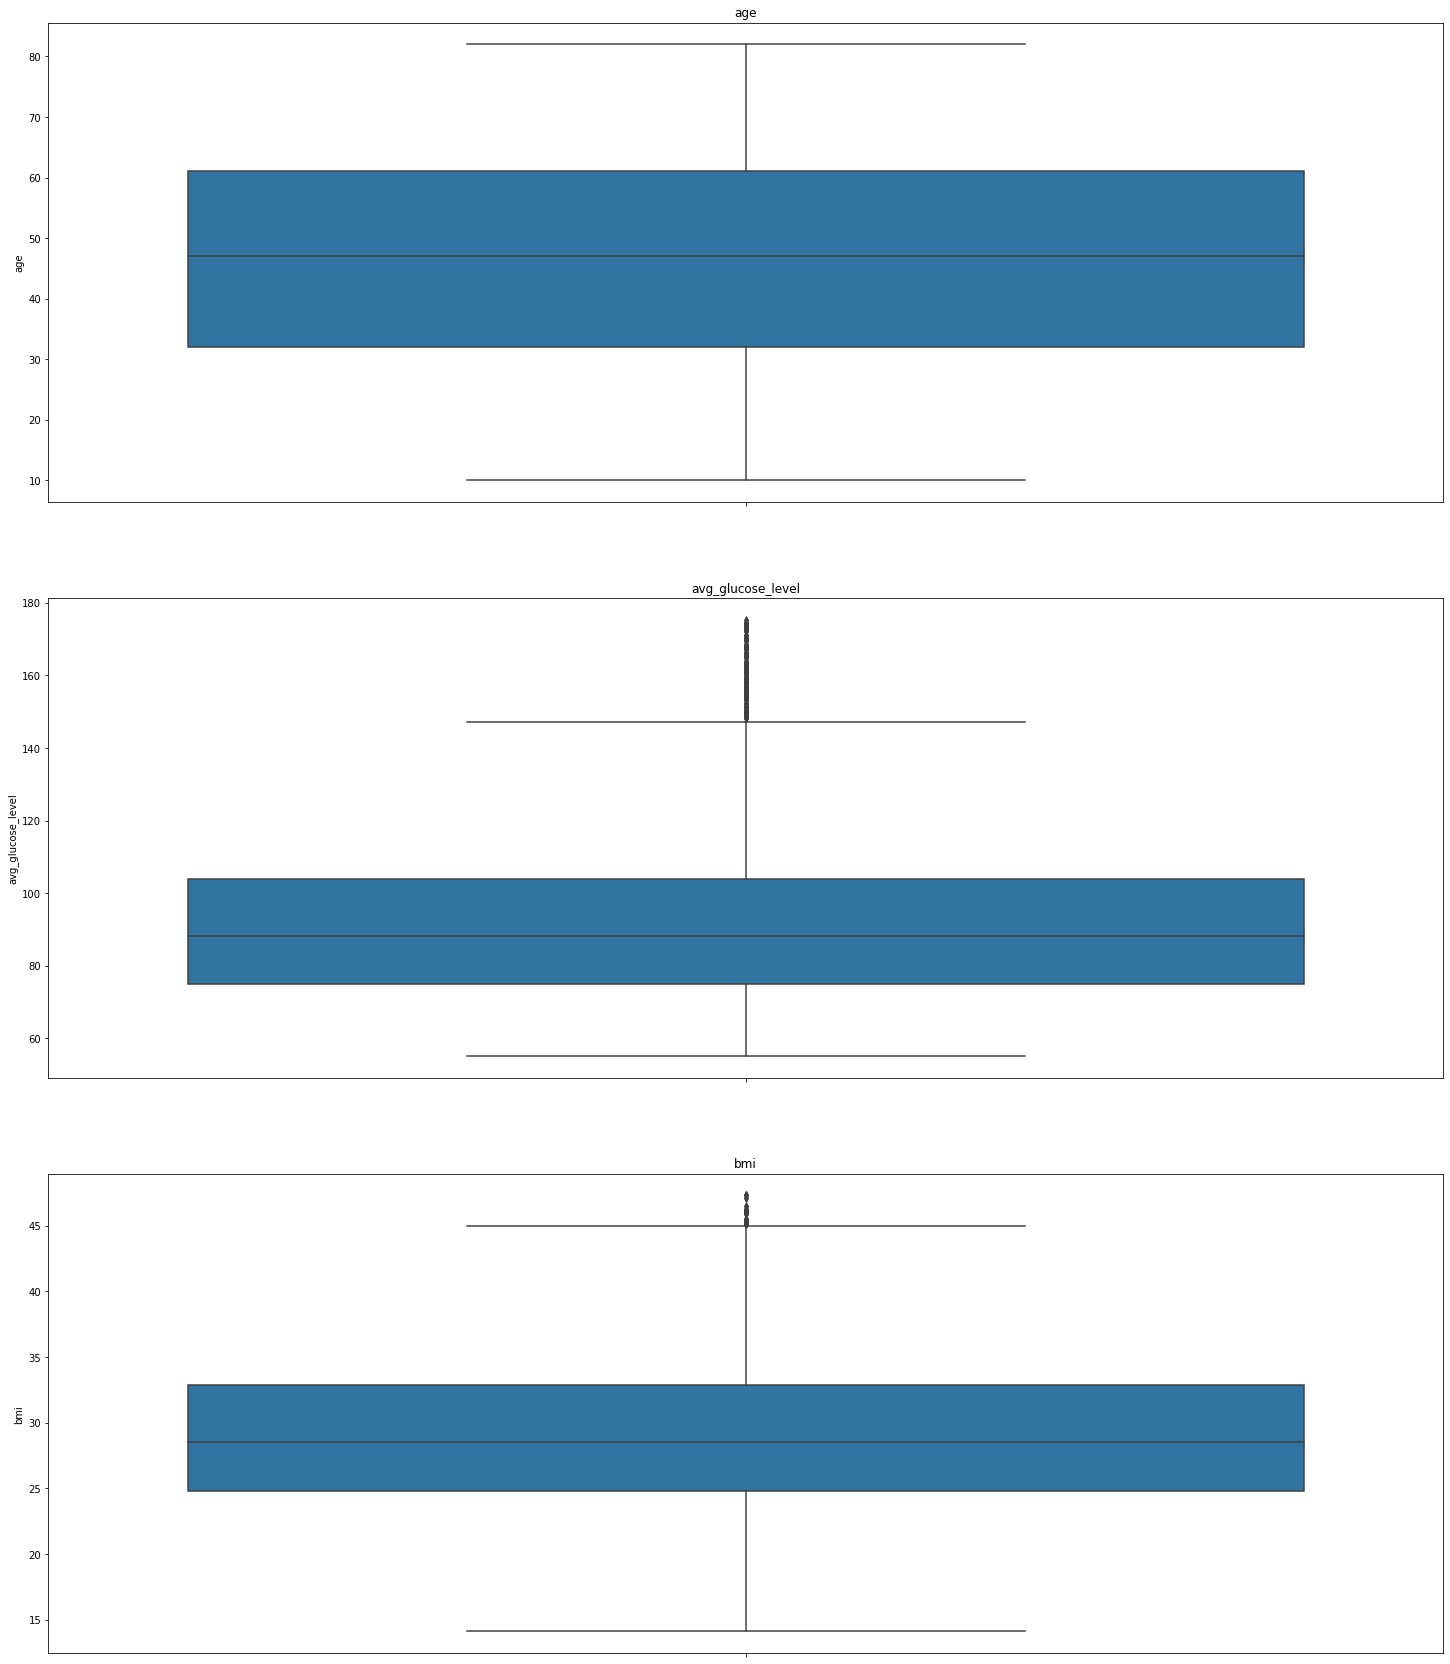

In [33]:
fig, ax = plt.subplots(len(num_feature),1, figsize=(25,30))
idx = 0
for feature in num_feature:
    sns.boxplot(data=df, y=feature, ax=ax[idx])
    ax[idx].set_title(feature)
    idx+=1

In [34]:
df.stroke.unique()

array([1, 0], dtype=int64)

D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.


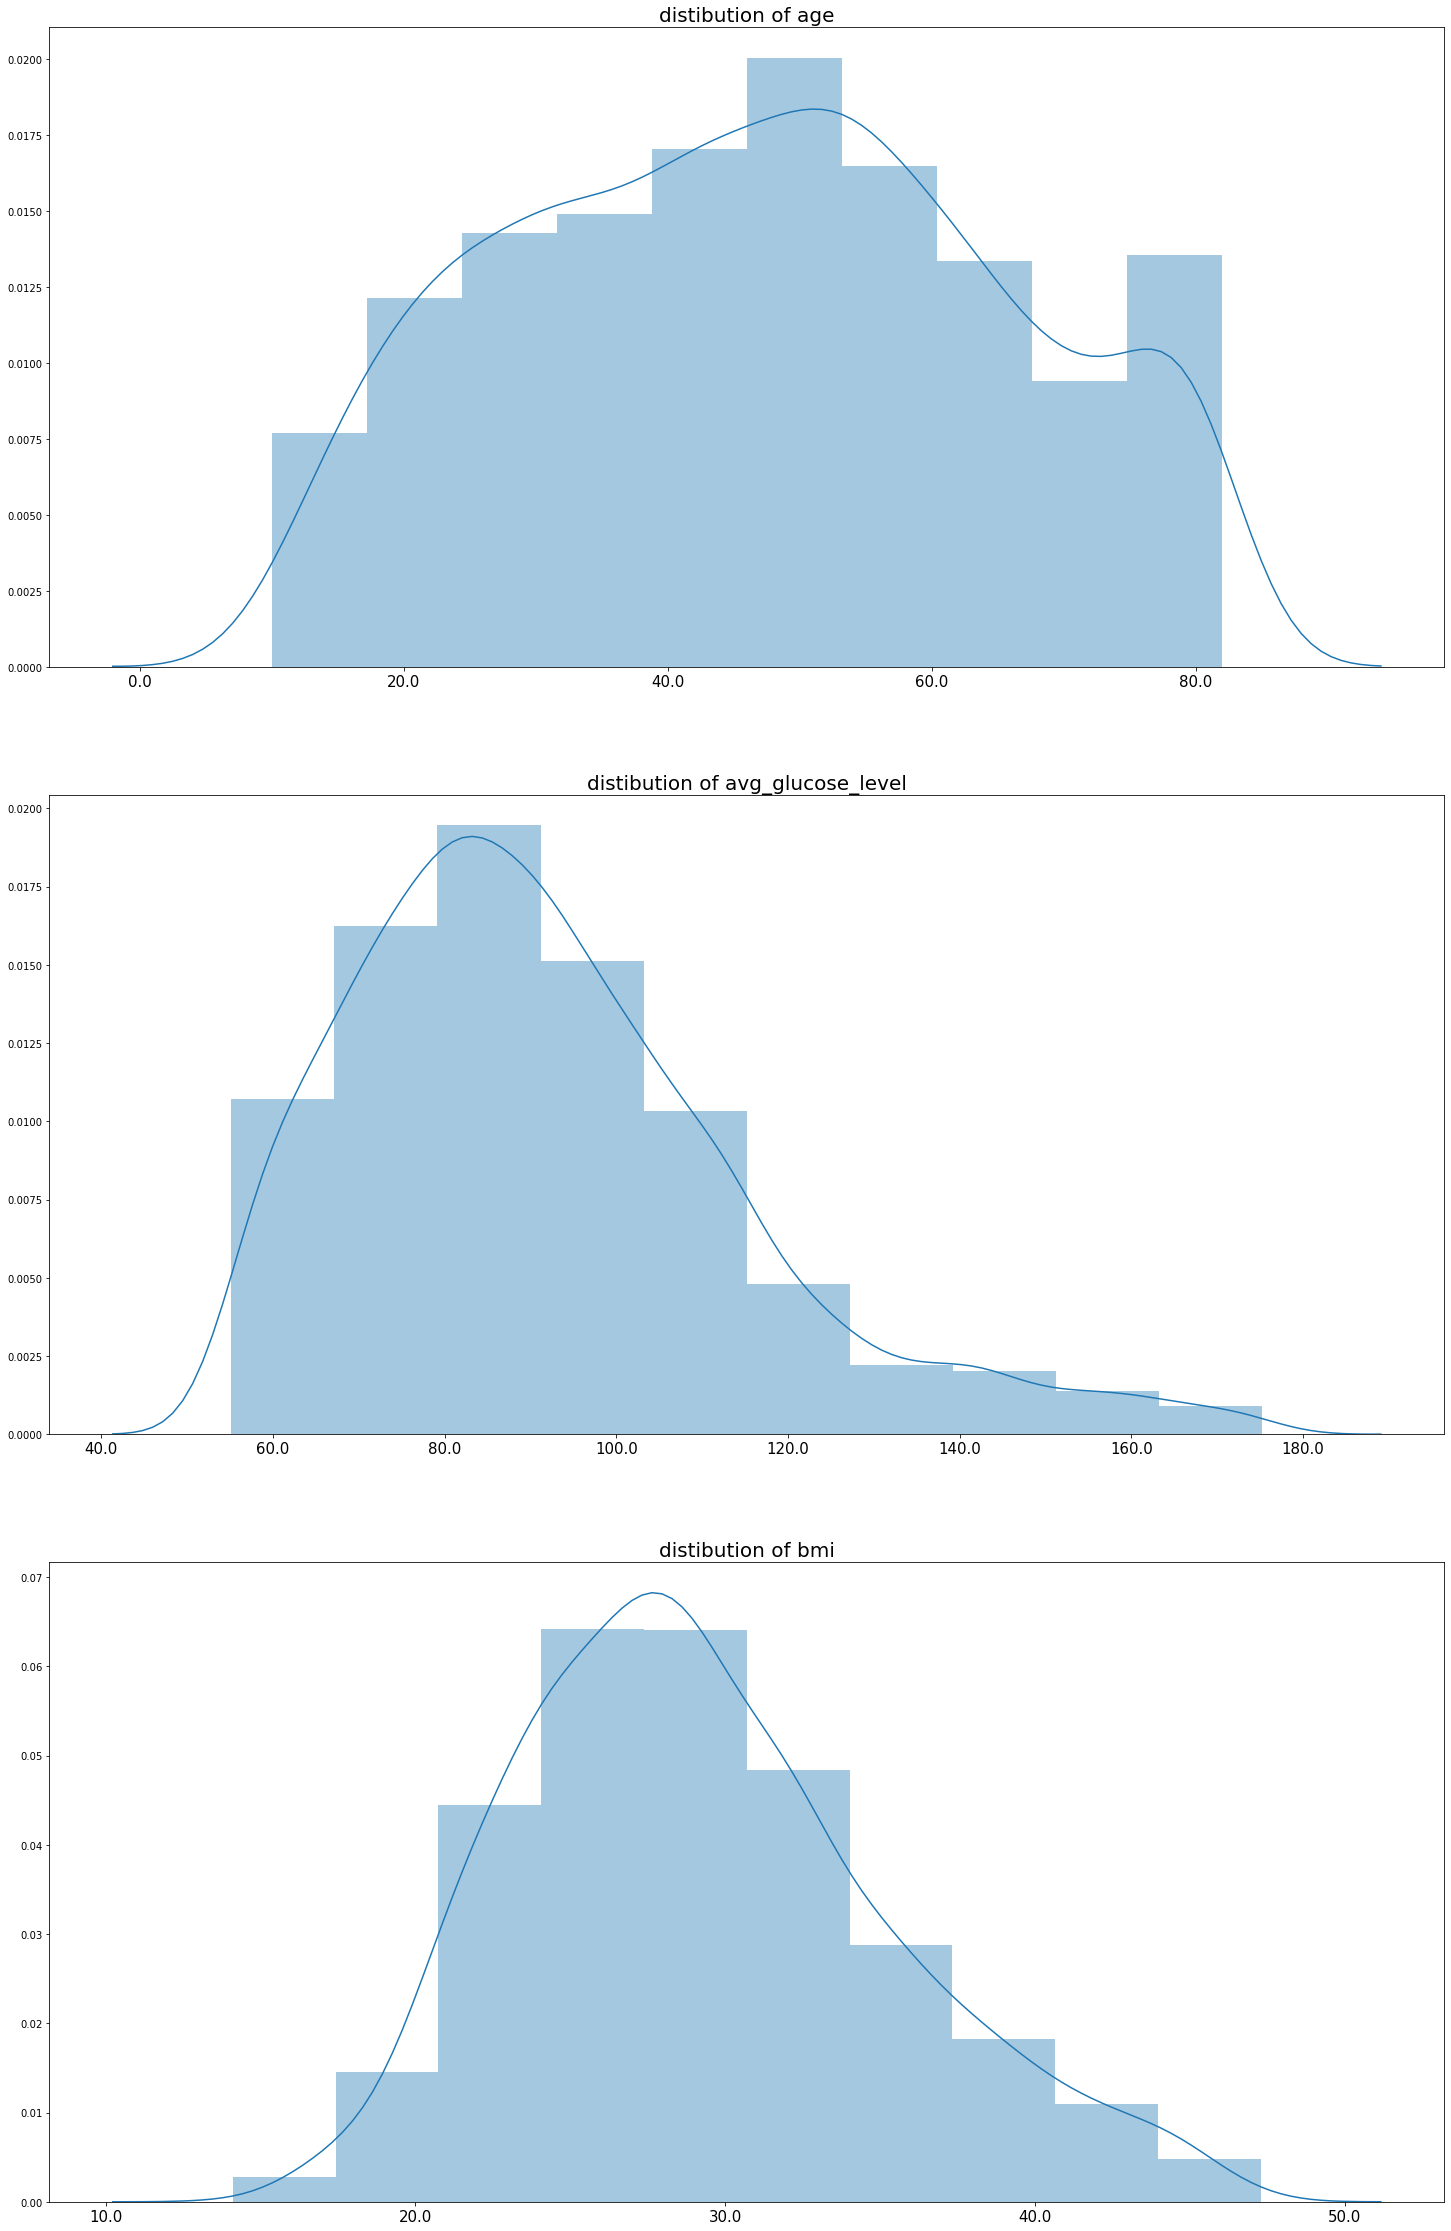

In [35]:
fig, ax = plt.subplots(len(num_feature),1, figsize=(25,40))
idx=0
for ft in num_feature:
    sns.distplot(df[ft], bins=10, ax=ax[idx])
    ax[idx].set_xticklabels(ax[idx].get_xticks(), fontsize=15)
    ax[idx].set_title("distibution of "+str(ax[idx].get_xlabel()), fontsize=20)
    ax[idx].set_xlabel("", fontsize=15)
    idx+=1
plt.show()

`Jika dilihat dari sitribusi, kolom sudah hampir bersidtribusi normal dan tidak terlalu condong atau skew`,`Tetapi dalam pipeline nanti tetap akan di transform dengan yeo-johnson`

# Correlation check

In [36]:
df.corr()

,id,age,avg_glucose_level,bmi,stroke
id,1.000000,0.003484,0.018597,0.011170,-0.014159
age,0.003484,1.000000,-0.014474,0.094409,0.237400
avg_glucose_level,0.018597,-0.014474,1.000000,0.004823,0.014268
bmi,0.011170,0.094409,0.004823,1.000000,-0.007867
stroke,-0.014159,0.237400,0.014268,-0.007867,1.000000


`Semua kolom feature tidak ada yang saling berkorelasi kuat`,`itu tandanya tidak perlu ada kolom yang di reduct`

# Split Data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
df[cat_feature] = df[cat_feature].astype(object)

In [39]:
X = df.drop(columns="stroke")
y = df.stroke

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2395, 11), (599, 11), (2395,), (599,))

# Build Pipeline

In [40]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder ,MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [41]:
num_pipline = Pipeline([
    ('inputer', SimpleImputer(strategy='mean')),
    ('transformer', PowerTransformer('yeo-johnson')),
    ('scaling', RobustScaler())
])

cat_pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='most_frequent')),
    ('encoding', OrdinalEncoder())
])

In [42]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipline, num_feature),
    ('categorical', cat_pipeline, cat_feature)
])

In [45]:
from jcopml.tuning.space import Real, Integer # Library buatan mas WiraDKP https://www.linkedin.com/in/wiradkputra/
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy

In [46]:
params_rf = {
    'algo__n_estimators': Integer(low=100, high=200),
    'algo__max_depth':Integer(low=20, high=80),
    'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
    'algo__min_samples_leaf':Integer(low=1, high=20)
}

In [47]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])


model_rf = RandomizedSearchCV(pipeline, params_rf, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_rf.fit(X_train, y_train)

print(model_rf.best_params_)
print(model_rf.score(X_train, y_train), model_rf.best_score_, model_rf.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 58, 'algo__max_features': 0.8168886881742097, 'algo__min_samples_leaf': 15, 'algo__n_estimators': 171}
0.9553235908141963 0.9553237495072683 0.9549248747913188


### Cek confusion matrix model random forest

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
confusion_matrix(y_test, model_rf.predict(X_test))

array([[572,   0],
       [ 27,   0]], dtype=int64)

In [50]:
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       572
           1       0.00      0.00      0.00        27

    accuracy                           0.95       599
   macro avg       0.48      0.50      0.49       599
weighted avg       0.91      0.95      0.93       599



D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
y_test.value_counts()

0    572
1     27
Name: stroke, dtype: int64

`Jika hanya berpacu pada accuracy model memiliki accuracy yang sangat baik, tetapi jika dilihat ternyata model salah semua dalam memprediksi pasien positif`,`oleh karenanya coba lakukan pembobotan dan gunakan scoring f1-score`

In [52]:
params_rf = {
    'algo__n_estimators': Integer(low=100, high=200),
    'algo__max_depth':Integer(low=20, high=80),
    'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
    'algo__min_samples_leaf':Integer(low=1, high=20),
    'algo__class_weight':[{0: x, 1: 1-x} for x in [0.05, 0.1, 0.25]]
}

In [53]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model_rf = RandomizedSearchCV(pipeline, params_rf, cv=3, n_iter=50, scoring='f1', n_jobs=-1, verbose=1, random_state=42)
model_rf.fit(X_train, y_train)

print(model_rf.best_params_)
print(model_rf.score(X_train, y_train), model_rf.best_score_, model_rf.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__class_weight': {0: 0.1, 1: 0.9}, 'algo__max_depth': 22, 'algo__max_features': 0.8285509415257439, 'algo__min_samples_leaf': 20, 'algo__n_estimators': 195}
0.3899371069182389 0.28697653697653697 0.23076923076923078


In [54]:
confusion_matrix(y_test, model_rf.predict(X_test))

array([[530,  42],
       [ 18,   9]], dtype=int64)

In [55]:
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       572
           1       0.18      0.33      0.23        27

    accuracy                           0.90       599
   macro avg       0.57      0.63      0.59       599
weighted avg       0.93      0.90      0.91       599



`Dengan melakukan pembobotan prediksi pada data text menjadi lebih baik walau masih banyak salah prediksi`

# Resampling data dengan SMOTE

`Teknik resampling merupakan pembuatan data dummy dengan algoritma tertentu, pada proyek kali ini akan digunakan algoritma SMOTE yang berdasarkan pada algoritma KNN`

In [56]:
import imblearn, sklearn
print(imblearn.__version__, sklearn.__version__)

0.8.1 1.0


In [57]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

`Resampling data train saja, mengapa ? jika data test ikut diresampling dan misalkan accuracy model bagus apa maknanya ? bisa saja data test yang benar diprediksi adalah data buatan hasil resampling, oleh karenanya untuk menilai model baik atau tidak uji dengan data yang asli`

In [58]:
res_pipeline = Pipeline([
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model_rf = RandomizedSearchCV(res_pipeline, params_rf, cv=3, n_iter=50, scoring='f1', n_jobs=-1, verbose=1, random_state=42)
model_rf.fit(X_train, y_train)

print(model_rf.best_params_)
print(model_rf.score(X_train, y_train), model_rf.best_score_, model_rf.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__class_weight': {0: 0.25, 1: 0.75}, 'algo__max_depth': 63, 'algo__max_features': 0.5456592191001433, 'algo__min_samples_leaf': 15, 'algo__n_estimators': 134}
0.29850746268656714 0.19381649009227578 0.18181818181818182


In [59]:
confusion_matrix(y_test, model_rf.predict(X_test))

array([[439, 133],
       [ 11,  16]], dtype=int64)

In [60]:
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       572
           1       0.11      0.59      0.18        27

    accuracy                           0.76       599
   macro avg       0.54      0.68      0.52       599
weighted avg       0.94      0.76      0.83       599



`Walaupun accuracy berkurang, tetapi model dapat memprediksi pasien positif lebih baik dari sebelumnya`

`Tunning hyperparameter dari SMOTE`

In [62]:
params_rf = {
    'smote__k_neighbors': Integer(low=1, high=30),    
    'algo__n_estimators': Integer(low=100, high=200),
    'algo__max_depth':Integer(low=20, high=80),
    'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
    'algo__min_samples_leaf':Integer(low=1, high=20),
    'algo__class_weight':[{0: x, 1: 1-x} for x in [0.05, 0.1, 0.25]]
}

1. `Untuk parameter random_state tidak ditunning karena parameter tersebut hanya untuk menjaga faktor`**` random saja`**
2. `parameter sampling_strategy juga tidak ditunning karena yang akan disampling`**`kelas minoritas`**`saja.`

`Jika diperhatikan dari rumus dibawah ini :`<br>
$$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$ <br>
$$ Precision = \frac{TP}{TP+FP} $$<br>
$$ Recall = \frac{TP}{TP+FN}$$ <br>
$$ F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN} $$ <br>
`Untuk mengecilkan false negatif (salah dalam memprediksi pasien positif, metrics yang cocok adalah recall`

In [63]:
res_pipeline = Pipeline([
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='minority', n_jobs=-1)),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model_rf = RandomizedSearchCV(res_pipeline, params_rf, cv=5, n_iter=50, scoring='recall', n_jobs=-1, verbose=1, random_state=42)
model_rf.fit(X_train, y_train)

print(model_rf.best_params_)
print(model_rf.score(X_train, y_train), model_rf.best_score_, model_rf.score(X_test, y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__class_weight': {0: 0.05, 1: 0.95}, 'algo__max_depth': 27, 'algo__max_features': 0.13094966900369656, 'algo__min_samples_leaf': 14, 'algo__n_estimators': 180, 'smote__k_neighbors': 4}
1.0 0.8883116883116884 0.8888888888888888


In [64]:
confusion_matrix(y_test, model_rf.predict(X_test))

array([[284, 288],
       [  3,  24]], dtype=int64)

In [65]:
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.50      0.66       572
           1       0.08      0.89      0.14        27

    accuracy                           0.51       599
   macro avg       0.53      0.69      0.40       599
weighted avg       0.95      0.51      0.64       599



In [66]:
from sklearn.metrics import f1_score, accuracy_score

In [67]:
f1_score(y_test, model_rf.predict(X_test))

0.14159292035398233

In [68]:
accuracy_score(y_test, model_rf.predict(X_test))

0.5141903171953256

`Tetapi hal tersebut menyebabkan banyak prediksi yang salah dari kelas negatif.` `Jika model salah dalam memprediksi pasien negatif (aslinya negatif diprediksi positif) tentu jauh lebih baik ketimbang aslinya positif tetapi diprediksi negatif. Namun kembali lagi pada keputusan klien atau pihak berkepentingan`

`Dan jika ingin memprebaiki kualitas model maka perbanyak sample dan `**`jangan imbalance`**